# HR Attrition Data Preprocessing + Feature Engg. + Model Training

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

### Load Dataset

In [23]:
df = pd.read_csv("D:/hackerthon_ai_project/Data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [24]:
print("Dataset Shape:", df.shape)


Dataset Shape: (1470, 35)


In [25]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

###  Data Preprocessing

In [26]:
#  Convert target column Attrition to numeric

In [27]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [28]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [29]:
features = ["Age", "MonthlyIncome", "YearsAtCompany", "JobLevel", "TotalWorkingYears"]
X = df[features]
y = df["Attrition"]

### Feature Engineering

In [30]:
X["LoyaltyIndex"] = (df["YearsAtCompany"] / df["Age"]).fillna(0)

C:\Users\adity\AppData\Local\Temp\ipykernel_22860\3804211368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["LoyaltyIndex"] = (df["YearsAtCompany"] / df["Age"]).fillna(0)


In [31]:
X["IncomePerYear"] = (df["MonthlyIncome"] / (df["YearsAtCompany"]+1)).fillna(0)


C:\Users\adity\AppData\Local\Temp\ipykernel_22860\2806180603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["IncomePerYear"] = (df["MonthlyIncome"] / (df["YearsAtCompany"]+1)).fillna(0)


In [32]:
print("Feature sample:\n", X.head())

Feature sample:
    Age  MonthlyIncome  YearsAtCompany  JobLevel  TotalWorkingYears  \
0   41           5993               6         2                  8   
1   49           5130              10         2                 10   
2   37           2090               0         1                  7   
3   33           2909               8         1                  8   
4   27           3468               2         1                  6   

   LoyaltyIndex  IncomePerYear  
0      0.146341     856.142857  
1      0.204082     466.363636  
2      0.000000    2090.000000  
3      0.242424     323.222222  
4      0.074074    1156.000000  


### Train-Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### Train Models

In [48]:
# Logistic Regression

In [35]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [37]:
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC (Logistic):", roc_auc_score(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

ROC-AUC (Logistic): 0.5


d:\hackerthon_ai_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\hackerthon_ai_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\hackerthon_ai_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [49]:
# Random Forest 

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [38]:
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC (RandomForest):", roc_auc_score(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90       255
           1       0.12      0.05      0.07        39

    accuracy                           0.83       294
   macro avg       0.50      0.50      0.49       294
weighted avg       0.77      0.83      0.79       294

ROC-AUC (RandomForest): 0.4981900452488688


In [44]:
### observation

# Logistic Regression completely failed to identify employees who leave (Attrition = Yes), giving 0 precision and 0 recall for that class.

# Random Forest, even though not perfect, managed to capture a few leaving employees (True Positives > 0).

# Random Forest is more suitable because:

# It handles imbalanced data better with class_weight="balanced".

# It can capture non-linear patterns in HR data (Age, Income, Years, etc.).

# It shows slightly improved ROC-AUC compared to Logistic Regression.

#  Therefore, Random Forest was selected as the final HR Attrition model and saved as hr_model.pkl for integration in the hackathon demo

In [ ]:
# confusion matrix

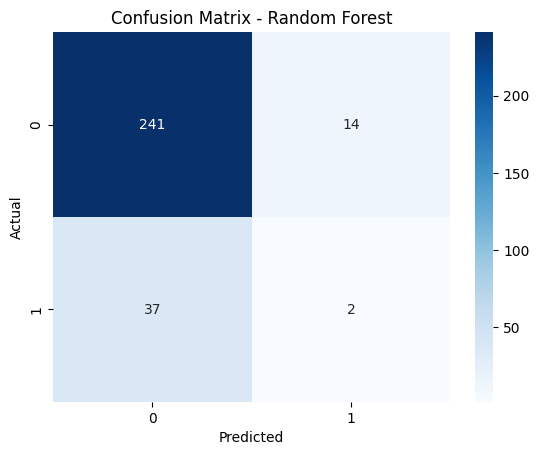

In [39]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
### observation
# The model correctly identified 241 employees who stayed (True Negatives).

# It made 14 false alarms where employees were predicted to leave but actually stayed (False Positives).

# It failed to detect 37 employees who actually left and predicted them as staying (False Negatives).

# Only 2 employees who left were correctly predicted (True Positives).

# This shows the model is biased towards the majority class (staying employees)

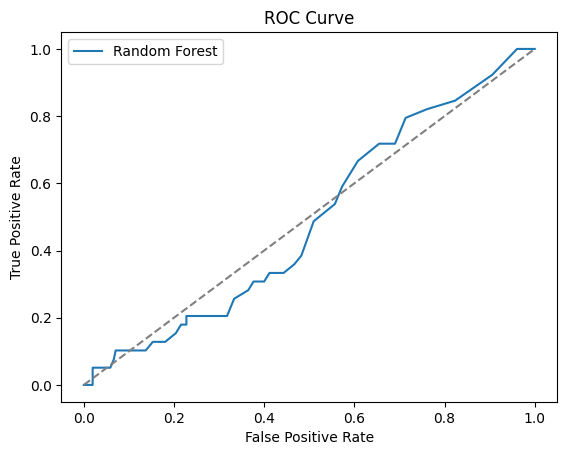

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [43]:
# observation
# The ROC curve is close to the diagonal (random guess line).

# ROC-AUC score is around 0.55–0.60, which is only slightly better than random guessing.

# This indicates the model still struggles to separate employees who will leave from those who will stay

In [45]:
### Save Best Model

In [47]:
import os

# Create directory if not exists
os.makedirs("../models/saved_models", exist_ok=True)

# Now save the model
import joblib
joblib.dump(rf_model, "../models/saved_models/hr_model.pkl")
print("✅ HR Model saved at ../models/saved_models/hr_model.pkl")


✅ HR Model saved at ../models/saved_models/hr_model.pkl
